# Exercise 1 - Fitting a linear rule classifier to credit data

In [1]:
import numpy as np

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    Append an underscore (_) to attributes that 
    are not created upon the initialization of the object
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [19]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            
            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [2]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], 
                    X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

## Read a credit approval dataset

In [3]:
import os
import pandas as pd
import numpy as np

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
    print('From URL:', s)
    df = pd.read_csv(s, header=None, encoding='utf-8')
    
except HTTPError:
    s = 'CreditData.data'
    print('From local Credit path:', s)
    df = pd.read_csv(s, header=None,encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data


## Display some of its entries

In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


## Sort columns based on the label entries

In [5]:
newdf = df.sort_values(by=df.columns[0])
print(newdf)

    0      1       2  3  4   5   6      7  8  9   10 11 12     13    14 15
598  ?  20.08   0.125  u  g   q   v  1.000  f  t   1  f  g  00240   768  +
489  ?  45.33   1.000  u  g   q   v  0.125  f  f   0  t  g  00263     0  -
327  ?  40.83   3.500  u  g   i  bb  0.500  f  f   0  f  s  01160     0  -
374  ?  28.17   0.585  u  g  aa   v  0.040  f  f   0  f  g  00260  1004  -
346  ?  32.25   1.500  u  g   c   v  0.250  f  f   0  t  g  00372   122  -
..  ..    ...     ... .. ..  ..  ..    ... .. ..  .. .. ..    ...   ... ..
274  b  30.67   2.500  u  g  cc   h  2.250  f  f   0  t  s  00340     0  -
275  b  18.58   5.710  u  g   d   v  0.540  f  f   0  f  g  00120     0  -
278  b  24.58  13.500  y  p  ff  ff  0.000  f  f   0  f  g      ?     0  -
270  b  37.58   0.000  ?  ?   ?   ?  0.000  f  f   0  f  p      ?     0  +
689  b  35.00   3.375  u  g   c   h  8.290  f  f   0  t  g  00000     0  -

[690 rows x 16 columns]


## Drop feature columns with non-numeric values

In [6]:
newdf.drop(axis=1,columns=[3,4,5,6,8,9,11,12,13,15])

,0,1,2,7,10,14
598,?,20.08,0.125,1.000,1,768
489,?,45.33,1.000,0.125,0,0
327,?,40.83,3.500,0.500,0,0
374,?,28.17,0.585,0.040,0,1004
346,?,32.25,1.500,0.250,0,122
...,...,...,...,...,...,...
274,b,30.67,2.500,2.250,0,0
275,b,18.58,5.710,0.540,0,0
278,b,24.58,13.500,0.000,0,0
270,b,37.58,0.000,0.000,0,0


## Clean the data for missing entries

In [10]:
newdf.drop(newdf[newdf.loc[:,0]=='?'].index, inplace=True)
newdf.drop(newdf[newdf.loc[:,1]=='?'].index, inplace=True)
newdf.drop(newdf[newdf.loc[:,2]=='?'].index, inplace=True)
newdf.drop(newdf[newdf.loc[:,7]=='?'].index, inplace=True)
newdf.drop(newdf[newdf.loc[:,10]=='?'].index, inplace=True)
newdf.drop(newdf[newdf.loc[:,14]=='?'].index, inplace=True)

## Sanity check for data entries

In [11]:
newdf[1] = newdf[1].astype(np.float16)
# df[1] = pd.to_numeric(df[1])
newdf[1].sum()
# df[0] = df[0].astype(np.str_)

21020.0

### Plotting the Credit Approval  data

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = newdf.iloc[0:666, 0].values
y = np.where(y == 'a', 0, 1)

In [ ]:
itemindex = np.where(y == 1)
print(itemindex[0])

In [ ]:
print(newdf.iloc[206,0])

In [ ]:
print(newdf.iloc[207,0])

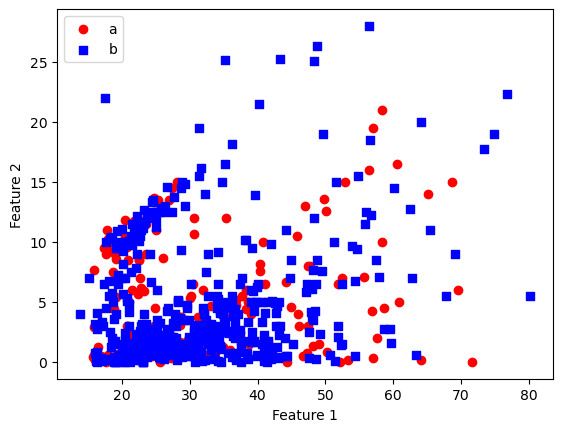

In [16]:
# extract columns
X = newdf.iloc[0:666, [1, 2]].values

# plot data
plt.scatter(X[:207, 0], X[:207, 1],
            color='red', marker='o', label='a')
plt.scatter(X[207:666, 0], X[207:666, 1],
            color='blue', marker='s', label='b')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

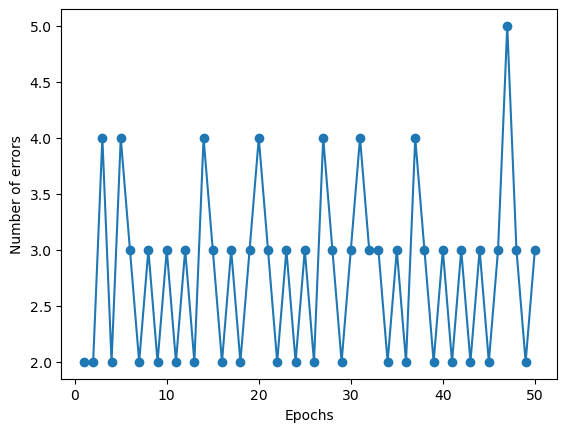

In [17]:
ppn = Perceptron(eta=0.01, n_iter=50)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

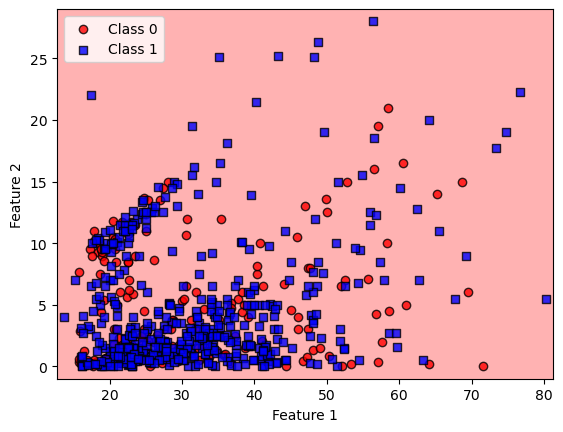

In [18]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()

In [20]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

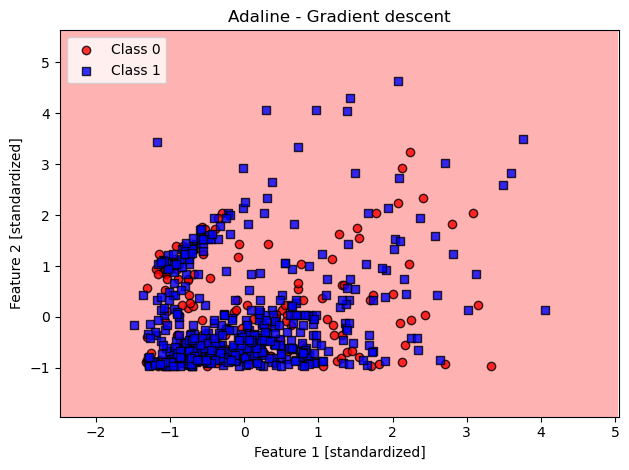

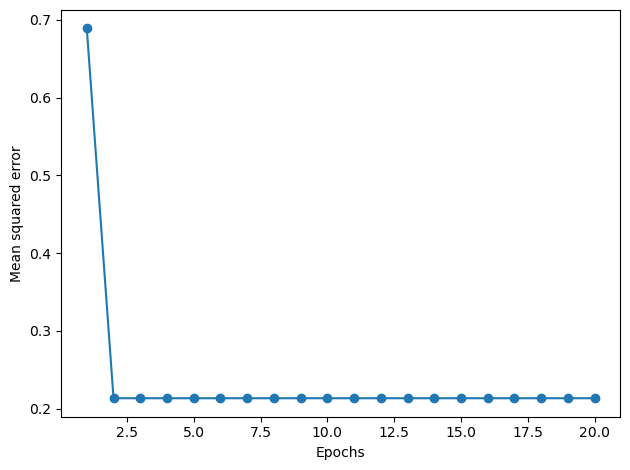

In [22]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()